# Sklearn

## sklearn.datasets

документация: http://scikit-learn.org/stable/datasets/

In [1]:
from sklearn import datasets

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация выборок

**Способы генерации данных:** 
* make_classification
* make_regression
* make_circles
* make_checkerboard
* etc

#### datasets.make_circles

In [3]:
circles = datasets.make_circles()

In [4]:
print "features: {}".format(circles[0][:10])
print "target: {}".format(circles[1][:10])

features: [[-0.5831749  -0.54763768]
 [-0.79369176 -0.10026659]
 [-0.18738131 -0.98228725]
 [ 0.87630668 -0.48175367]
 [ 1.          0.        ]
 [ 0.50993919 -0.61641059]
 [-0.2472136  -0.76084521]
 [-0.87630668  0.48175367]
 [ 0.6472136  -0.4702282 ]
 [ 0.42866144  0.67546234]]
target: [1 1 0 0 0 1 1 0 1 1]


In [5]:
from matplotlib.colors import ListedColormap

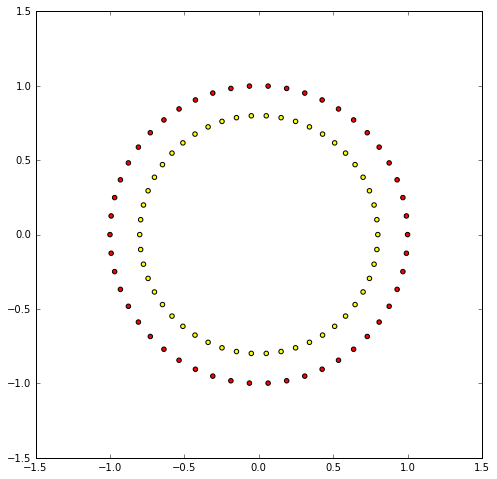

In [6]:
colors = ListedColormap(['red', 'yellow'])

pyplot.figure(figsize(8, 8))
pyplot.scatter(map(lambda x: x[0], circles[0]), map(lambda x: x[1], circles[0]), c = circles[1], cmap = colors)

In [7]:
def plot_2d_dataset(data, colors):
    pyplot.figure(figsize(8, 8))
    pyplot.scatter(map(lambda x: x[0], data[0]), map(lambda x: x[1], data[0]), c = data[1], cmap = colors)

In [8]:
noisy_circles = datasets.make_circles(noise = 0.15)

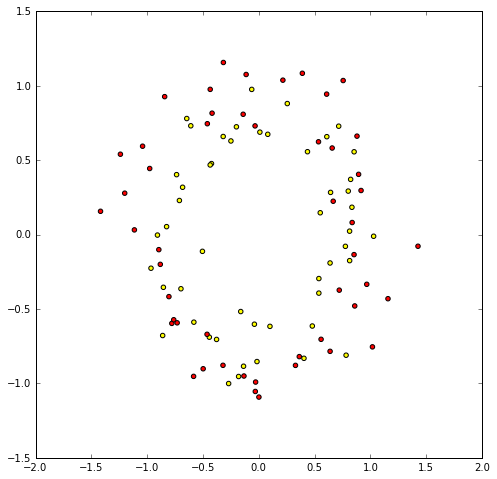

In [9]:
plot_2d_dataset(noisy_circles, colors)

#### datasets.make_classification

In [10]:
simple_classification_problem = datasets.make_classification(n_features = 2, n_informative = 1, 
                                                            n_redundant = 1, n_clusters_per_class = 1,
                                                            random_state = 1 )

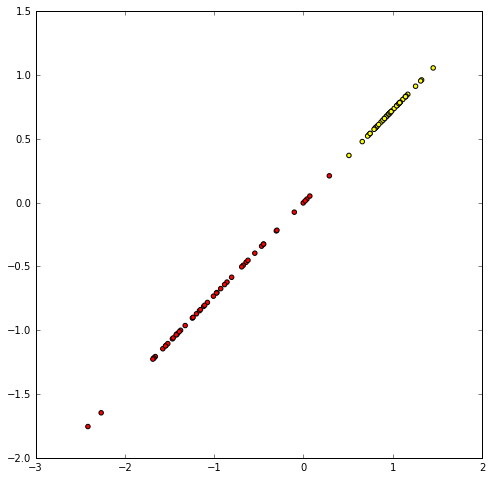

In [11]:
plot_2d_dataset(simple_classification_problem, colors)

In [12]:
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 4, 
                                                      n_redundant = 0, n_clusters_per_class = 1, random_state = 1)

colors = ListedColormap(['red', 'blue', 'green', 'yellow'])

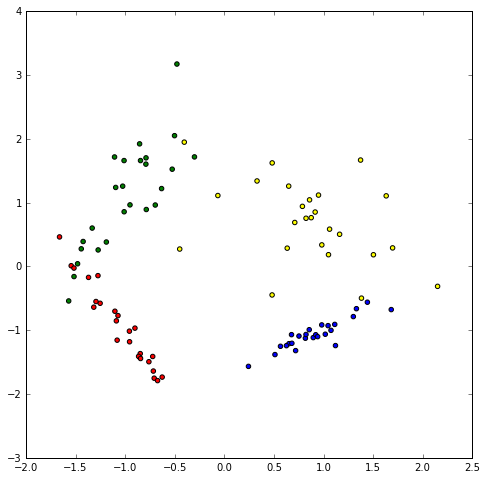

In [13]:
plot_2d_dataset(classification_problem, colors)

### "Игрушечные" наборы данных

**Наборы данных:** 
* load_iris 
* load_boston
* load_diabetes
* load_digits
* load_linnerud
* etc

#### datasets.load_iris

In [14]:
iris = datasets.load_iris()

In [15]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [16]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [17]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [ ]:
print "feature names: {}".format(iris.feature_names)
print "target names: {names}".format(names = iris.target_names)

In [ ]:
iris.data[:10]

In [ ]:
iris.target

### Визуализация выборки

In [18]:
from pandas import DataFrame

In [19]:
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target

In [ ]:
iris_frame.head()

In [ ]:
iris_frame.target = iris_frame.target.apply(lambda x : iris.target_names[x])

In [ ]:
iris_frame.head()

In [ ]:
iris_frame[iris_frame.target == 'setosa'].hist('sepal length (cm)')

In [ ]:
pyplot.figure(figsize(20, 24))

plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_frame[iris_frame.target == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

### Бонус: библиотека seaborn

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(iris_frame, hue = 'target')

In [ ]:
?sns.set()

In [ ]:
sns.set(font_scale = 1.3)
data = sns.load_dataset("iris")
sns.pairplot(data, hue = "species")

#### **Если Вас заинтересовала библиотека seaborn:**
* установка: https://stanford.edu/~mwaskom/software/seaborn/installing.html
* установка c помощью анаконды: https://anaconda.org/anaconda/seaborn
* руководство: https://stanford.edu/~mwaskom/software/seaborn/tutorial.html
* примеры: https://stanford.edu/~mwaskom/software/seaborn/examples/